In [1]:
!pip install seaborn --quiet

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

<BR>
    
# AUXILIAR FUNCTIONS

In [4]:
def plot_categories_expenses(categories_expenses):
    fig, ax = plt.subplots()
    df = pd.DataFrame(categories_expenses).reset_index()
    sns.barplot(x='sum', 
                y='category', 
                data=df, 
                color='xkcd:azure', 
                ax=ax,
                edgecolor=(0,0,0),
                linewidth=1) 
    ax.set_xlabel('Money spent')
    ax.set_ylabel('')
    ax.set_title('Categories Expenses')

    plt.plot()

In [13]:
def get_categories_expenses(df):
    categories = []
    for category in df['category'].unique().tolist():
        categories.append([category, df[df['category'] == category].amount.sum()])

    categories = pd.DataFrame(categories, columns=['category', 'sum']).set_index('category')
    
    return categories['sum'].sort_values(ascending=False)

<BR>
    
# SET ATTRIBUTES

In [6]:
month = '2021-11'

In [7]:
# Set your income here for each month
incomes = {
    '2021-11': 8000
}

<br>

# GET DATA

In [9]:
nubank = pd.read_csv('custos/custos-{}.csv'.format(month)).dropna()

In [11]:
income = incomes[month]

<br> 

# PRINT REPORT

In [16]:
nubank['date'] = nubank['date'].astype('datetime64[ns]')
nubank['day_of_the_month'] = nubank['date'].apply(lambda x: int(x.day))

### > Top expenses

In [17]:
print("Your top expenses were: \n")
print(nubank.sort_values('amount', ascending=False)[['title', 'category', 'amount']].head(10))

Your top expenses were: 

                      title       category   amount
94  Aluguel+Condominio+água         contas  2000.00
50     P N S das Merces 1/2         viagem   465.00
71   Sup Epa Setenta e Oito   supermercado   443.00
11    Apart Interiores 9/10  novas_compras   299.00
72        Zp *Sympla 3j5y5k  novas_compras   220.00
95                      Luz         contas   200.00
40             Art Walk 1/4  novas_compras   173.75
65        Zp *Sympla 3j5yr2  novas_compras   165.00
53   Tenente Pimenta Pub Ba    restaurante   162.25
49                  O Passo    restaurante   156.20


### > Costs by category

In [18]:
categories_expenses = get_categories_expenses(nubank)

category
contas           2604.90
novas_compras    2131.33
restaurante      1032.34
supermercado      953.90
transporte        489.70
viagem            465.00
saúde             236.28
serviços          236.23
Name: sum, dtype: float64


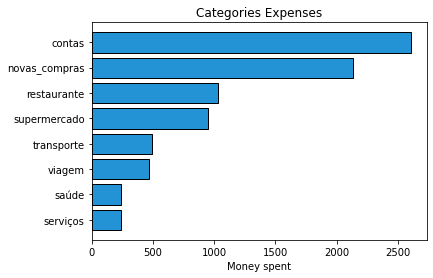

In [19]:
plot_categories_expenses(get_categories_expenses(nubank))
print(categories_expenses)

### > DIAGNOSIS

In [26]:
income_month = month
income = incomes[month]

cost = nubank['amount'].sum()

fixed_costs = nubank[(nubank['category']=='contas')]['amount'].sum()

superfluous = nubank[(nubank['category']=='novas_compras') | 
                     (nubank['category']=='videogames') |
                     (nubank['category']=='bar') |
                     (nubank['category']=='restaurante') 
                    ]['amount'].sum()

mandatory = nubank[(nubank['category']=='saúde') |
                   (nubank['category']=='supermercado') |
                   (nubank['category']=='serviços') |
                   (nubank['category']=='transporte')
                  ]['amount'].sum()

In [27]:
print('Month: {}'.format(income_month))
print('Month income: R${:.2f}'.format(float(income)))
print('Month costs: R${:.2f}'.format(cost))

print('')
print("Total spent with fixed costs: R${:.2f}".format(fixed_costs))
print("Total spent with superfluous expenses: R${:.2f}".format(superfluous))
print("Total spent with mandatory expenses: R${:.2f}".format(mandatory))

print('')
print("You've saved around R${:.2f}.".format(income - cost))
print("If you hadn't spent money on superfluous stuff, "\
      "you'd have saved a total of R${:.2f} this month.".format(fixed_costs+mandatory, income - cost + superfluous))

Month: 2021-11
Month income: R$9236.39
Month costs: R$8149.68

Total spent with fixed costs: R$2604.90
Total spent with superfluous expenses: R$3163.67
Total spent with mandatory expenses: R$1916.11

You've saved around R$1086.71.
If you hadn't spent money on superfluous stuff, you'd have saved a total of R$4521.01 this month.


### > Amount spent by day

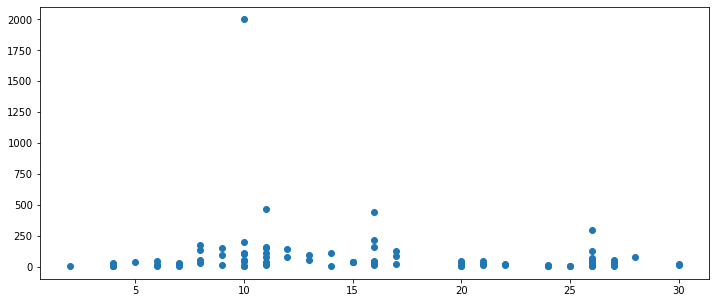

In [23]:
plt.figure(figsize=(12,5))
plt.plot(nubank['day_of_the_month'], nubank['amount'], linestyle='None', marker='o')